## Repeat Analysis by Segment

* First, Let's Divide the Data into each Candidate Camp.
* Then check how much data is left.
* then graph the Tweet Volume (Y)
* as well as independent variables (to look at distributions)
* if it looks decent, do the correlatins in R
* also, don't forget to try to do glm with family lognormal on the whole set.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas
%matplotlib inline
import numpy as np
from IPython.display import display, HTML
pandas.set_option('max_colwidth', 1000)

In [2]:
clinton_df=pandas.read_csv('DATA/FOR_CORR/clinton_w_emot.csv')
trump_df=pandas.read_csv('DATA/FOR_CORR/trump_w_emot.csv')
sanders_df=pandas.read_csv('DATA/FOR_CORR/sanders_w_emot.csv')
cruz_df=pandas.read_csv('DATA/FOR_CORR/cruz_w_emot.csv')

In [3]:
print clinton_df.columns
print 'clinton', len(clinton_df)
print 'trump', len(trump_df)
print 'sanders', len(sanders_df)
print 'cruz',len(cruz_df)

Index([u'url', u'org', u'candid_name', u'num_tweets', u'num_tweets_all',
       u'sentiment_mean', u'wc', u'negativ_ct', u'positiv_ct',
       u'negativ_percent', u'positiv_percent', u'emotionality', u'positivity'],
      dtype='object')
clinton 1964
trump 1983
sanders 1207
cruz 1495


## Clinton Descriptive Stats

In [4]:
clinton_df.num_tweets.mean()

3.2703665987780042

In [5]:
clinton_df.num_tweets.describe()

count    1964.000000
mean        3.270367
std         4.916596
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       115.000000
Name: num_tweets, dtype: float64

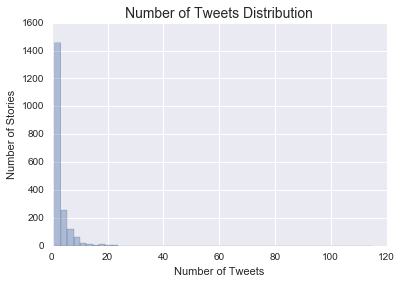

In [7]:
sns.distplot(clinton_df.num_tweets, kde=False, rug=False);
plt.title("Number of Tweets Distribution", fontsize=14)
plt.xlabel("Number of Tweets")
plt.ylabel("Number of Stories")
plt.savefig('FIGS/CORR/SEGMENTS/clinton_tweet_vol.png')

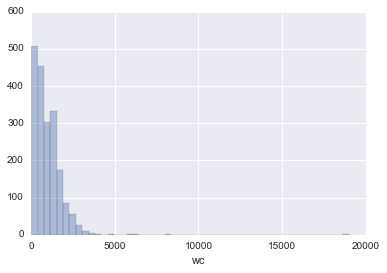

In [9]:
sns.distplot(clinton_df.wc, kde=False, rug=False);

## Trump Descriptive Stats

In [10]:
trump_df.num_tweets.mean()

4.4422592032274331

In [11]:
trump_df.num_tweets.describe()

count    1983.000000
mean        4.442259
std         8.333704
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       221.000000
Name: num_tweets, dtype: float64

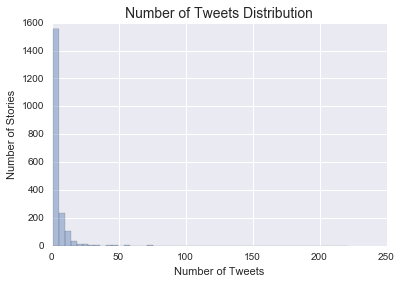

In [12]:
sns.distplot(trump_df.num_tweets, kde=False, rug=False);
plt.title("Number of Tweets Distribution", fontsize=14)
plt.xlabel("Number of Tweets")
plt.ylabel("Number of Stories")
plt.savefig('FIGS/CORR/SEGMENTS/trump_tweet_vol.png')

## Sanders 
Descriptive Stats

In [13]:
sanders_df.num_tweets.mean()

3.903893951946976

In [14]:
sanders_df.num_tweets.describe()

count    1207.000000
mean        3.903894
std         9.549333
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       136.000000
Name: num_tweets, dtype: float64

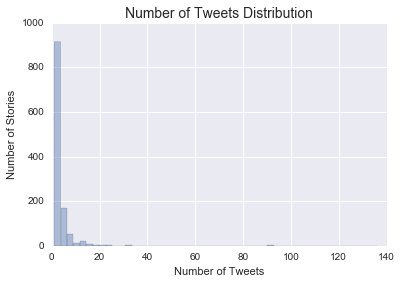

In [15]:
sns.distplot(sanders_df.num_tweets, kde=False, rug=False);
plt.title("Number of Tweets Distribution", fontsize=14)
plt.xlabel("Number of Tweets")
plt.ylabel("Number of Stories")
plt.savefig('FIGS/CORR/SEGMENTS/sanders_tweet_vol.png')

## Cruz Descriptive Stats

In [16]:
cruz_df.num_tweets.mean()

2.3003344481605352

In [17]:
cruz_df.num_tweets.describe()

count    1495.000000
mean        2.300334
std         3.556030
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        60.000000
Name: num_tweets, dtype: float64

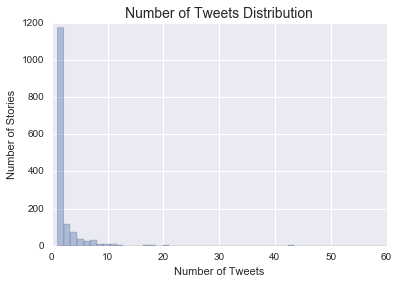

In [18]:
sns.distplot(cruz_df.num_tweets, kde=False, rug=False);
plt.title("Number of Tweets Distribution", fontsize=14)
plt.xlabel("Number of Tweets")
plt.ylabel("Number of Stories")
plt.savefig('FIGS/CORR/SEGMENTS/cruz_tweet_vol.png')

In [ ]:
 df.num_tweets.describe()

In [ ]:
plt.hist(df.num_tweets, bins=2000)

In [ ]:
numtweets = list(df.num_tweets)
numtweets.sort(reversTe=True)
sns.distplot(numtweets, kde=False, rug=False, bins=100);
plt.title("How Many Times was a Story Tweeted?")
plt.ylabel("Number of Stories")
plt.xlabel("Number of Tweets")
plt.savefig("FIGS/CORR/num_tweets_dist.png")

## is it a power law?
Returns the loglikelihood ratio, and its p-value, between the two distribution fits, assuming the candidate distributions are nested.
### R : float
Loglikelihood ratio of the two distributions’ fit to the data. If greater than 0, the first distribution is preferred. If less than 0, the second distribution is preferred.
### p : float
Significance of R

In [ ]:
import powerlaw 
data = numtweets # data can be list or numpy array 
results = powerlaw.Fit(data) 
print results.power_law.alpha 
print results.power_law.xmin 
R, p = results.distribution_compare('power_law', 'lognormal', normalized_ratio=True)
print "R", R
print "p", p
 

In [ ]:
results.plot_pdf()

In [ ]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("wc", "num_tweets", data=df, ax=ax, scatter_kws={"s": 100})


### Do them transforms

In [ ]:
df = df.dropna()

In [ ]:
sns.distplot(df.num_tweets, kde=False, rug=False);
plt.title("Number of Tweets Distribution", fontsize=14)
plt.xlabel("Number of Tweets")
plt.ylabel("Number of Stories")
plt.savefig("FIGS/CORR/num_tweets_dist.png")

In [ ]:
sns.distplot(df.log_num_tweets, kde=False, rug=False);
plt.title("Log(Number of Tweets) Distribution", fontsize=14)
plt.xlabel("Log(Number of Tweets)")
plt.ylabel("Number of Stories")
plt.savefig("FIGS/CORR/log_num_tweets_dist.png")

In [ ]:
df['log_log_num_tweets'] = df.log_num_tweets.apply(np.log)
df['log_log_log_num_tweets'] = df.log_log_num_tweets.apply(np.log)

In [ ]:
sns.distplot(df.log_log_num_tweets, kde=False, rug=False);
plt.title("LogLog(Number of Tweets) Distribution", fontsize=14)
plt.xlabel("LogLog(Number of Tweets)")
plt.ylabel("Number of Stories")
plt.savefig("FIGS/CORR/log_log_num_tweets_dist.png")

In [ ]:
sns.distplot(df.sqrt_num_tweets, kde=False, rug=False);
plt.title("Sqrt(Number of Tweets) Distribution", fontsize=14)
plt.xlabel("Sqrt(Number of Tweets)")
plt.ylabel("Number of Stories")
plt.savefig("FIGS/CORR/sqrt_num_tweets_dist.png")

In [ ]:
df['log_num_tweets'] = df.num_tweets.apply(np.log)
df['log_wc'] = df.wc.apply(np.log)
df['log_emot'] = df.emotionality.apply(lambda x: np.log(x + 1))
df['log_pos'] = df.positivity.apply(lambda x: np.log(x + 1))

In [ ]:
df['sqrt_num_tweets'] = df.num_tweets.apply(np.sqrt)
df['sqrt_wc'] = df.wc.apply(np.sqrt)
df['sqrt_emot'] = df.emotionality.apply(np.sqrt)
df['sqrt_pos'] = df.positivity.apply(lambda x: np.sqrt(abs(x)))

In [ ]:
df['sq_num_tweets'] = df.num_tweets.apply(np.square)
df['sq_wc'] = df.wc.apply(np.square)
df['sq_emot'] = df.emotionality.apply(np.square)
df['sq_pos'] = df.positivity.apply(np.square)

## first plot independent variables

In [ ]:
sns.distplot(df.wc, kde=False, rug=False);
plt.title("Story Length Distribution", fontsize=14)
plt.xlabel("Story Length")
plt.ylabel("Number of Stories")
plt.savefig("FIGS/CORR/wc_dist.png")

In [ ]:
sns.distplot(df.log_wc, kde=False, rug=False);
plt.title("Log(Story Length) Distribution", fontsize=14)
plt.xlabel("Log(Story Length)")
plt.ylabel("Number of Stories")
plt.savefig("FIGS/CORR/log_wc_dist.png")

In [ ]:
sns.distplot(df.sqrt_wc, kde=False, rug=False);
plt.title("Sqrt(Story Length) Distribution", fontsize=14)
plt.xlabel("Sqrt(Story Length)")
plt.ylabel("Number of Stories")
plt.savefig("FIGS/CORR/sqrt_wc_dist.png")

In [ ]:
sns.distplot(df.log_wc, kde=False, rug=False);
plt.title("Log(Story Length) Distribution", fontsize=14)
plt.xlabel("Log(Story Length)")
plt.ylabel("Number of Stories")
plt.savefig("FIGS/CORR/log_wc_dist.png")

In [ ]:
sns.distplot(df.emotionality, kde=False, rug=False);
plt.title("Emotionality Distribution", fontsize=14)
plt.xlabel("Emotionality")
plt.ylabel("Number of Stories")
plt.savefig("FIGS/CORR/emot_dist.png")

In [ ]:
sns.distplot(df.log_emot, kde=False, rug=False);
plt.title("Log(Emotionality) Distribution", fontsize=14)
plt.xlabel("Log(Emotionality)")
plt.ylabel("Number of Stories")
plt.savefig("FIGS/CORR/log_emot_dist.png")

In [ ]:
sns.distplot(df.sqrt_emot, kde=False, rug=False);
plt.title("Sqrt(Emotionality) Distribution", fontsize=14)
plt.xlabel("Sqrt(Emotionality)")
plt.ylabel("Number of Stories")
plt.savefig("FIGS/CORR/sqrt_emot_dist.png")

In [ ]:
sns.distplot(df.positivity, kde=False, rug=False);
plt.title("Positivity Distribution", fontsize=14)
plt.xlabel("Positivity")
plt.ylabel("Number of Stories")
plt.savefig("FIGS/CORR/pos_dist.png")

In [ ]:
sns.distplot(df.log_pos, kde=False, rug=False);
plt.title("Log(Positivity) Distribution", fontsize=14)
plt.xlabel("Log(Positivity)")
plt.ylabel("Number of Stories")
plt.savefig("FIGS/CORR/log_pos_dist.png")

In [ ]:
sns.distplot(df.sqrt_pos, kde=False, rug=False);
plt.title("Sqrt(abs(Positivity)) Distribution", fontsize=14)
plt.xlabel("Sqrt(abs(Positivity))")
plt.ylabel("Number of Stories")
plt.savefig("FIGS/CORR/sqrt_pos_dist.png")

## then plot relationships

In [ ]:
df.wc.min()

In [ ]:
g = sns.pairplot(df[['log_num_tweets', 'log_wc']])

In [ ]:
sns.distplot(df.num_tweets, kde=False, rug=False); 